# Global Processing using the Hough Transform (HT)

## Task # 01 Apply the Hough Tranform (HT) on a color image for detecting straight lines.

*   Write your observations by changing the threshold on the accumulation votes.

In [32]:
# Import necessary libraries/packages
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image


In [33]:
def load_image_as_np_array(filepath):
    # Open the image file
    img = Image.open(filepath)
    
    # Convert the image to a NumPy array
    img_array = np.array(img)
    
    return img_array

def display_images(images, titles,max_img_per_row=3,vmin=0,vmax=255,conversion=cv2.COLOR_BGR2RGB):
   
    num_images = len(images)
    max_images_per_row = max_img_per_row
    num_rows = (num_images + max_images_per_row - 1) // max_images_per_row  # Calculate number of rows needed
    
    # Create the subplots
    fig, axs = plt.subplots(num_rows, max_images_per_row, figsize=(15, 5 * num_rows))
    
    # Flatten the axs array in case of multiple rows
    axs = axs.flatten()
    
    for i in range(num_images):
        # disp_image = cv2.cvtColor(images[i].astype(np.uint8),conversion)
        axs[i].imshow(images[i],cmap='grey', vmin=vmin, vmax=vmax)
        axs[i].set_title(titles[i])
        axs[i].axis('off')  # Hide axes
    
    # Turn off remaining subplots if there are any
    for i in range(num_images, len(axs)):
        axs[i].axis('off')
    
    plt.tight_layout()
    plt.show()

def display_color_images(images, titles,max_img_per_row=3,vmin=0,vmax=255,conversion=cv2.COLOR_BGR2RGB):
   
    num_images = len(images)
    max_images_per_row = max_img_per_row
    num_rows = (num_images + max_images_per_row - 1) // max_images_per_row  # Calculate number of rows needed
    
    # Create the subplots
    fig, axs = plt.subplots(num_rows, max_images_per_row, figsize=(15, 5 * num_rows))
    
    # Flatten the axs array in case of multiple rows
    axs = axs.flatten()
    
    for i in range(num_images):
        disp_image = cv2.cvtColor(images[i].astype(np.uint8),conversion)
        axs[i].imshow(disp_image)
        axs[i].set_title(titles[i])
        axs[i].axis('off')  # Hide axes
    
    # Turn off remaining subplots if there are any
    for i in range(num_images, len(axs)):
        axs[i].axis('off')
    
    plt.tight_layout()
    plt.show()
    
def scale(array, max = 255):
    min_val = np.min(array)
    max_val = np.max(array)
    
    if max_val == min_val:
        return np.zeros_like(array, dtype=np.uint8)  # Avoid division by zero
    
    scaled_array = (array - min_val) / (max_val - min_val) * max
    return scaled_array.astype(np.uint8)

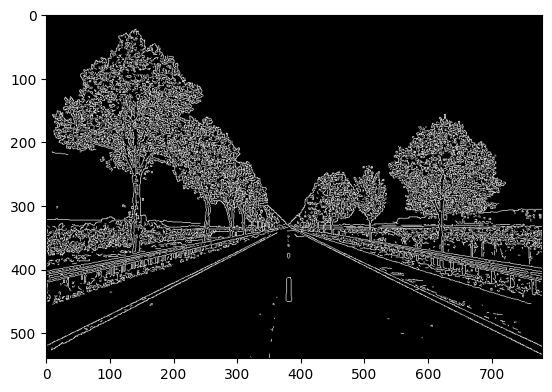

In [34]:
img = cv2.imread('image.jpg')

# Resize image
img = cv2.resize(img, (780, 540),
               interpolation = cv2.INTER_LINEAR)
img_task3 = img.copy()

# Convert the img to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Apply edge detection method on the image [Very Important preprocessing task]
# This will give a single-pixel thick edges
# Change the Lower and Upper thresholds and observe the changes
edges = cv2.Canny(gray, 100, 150, apertureSize=3)

plt.imshow(edges,cmap='grey')

* Variation of the thresholds in the Canny function:
  - **Ans:** The canny edge detection algorithm has two thresholds - $T_l$ and $T_h$. If the gradient $G$ of an edge is lower than $T_l$ then it is discarded, if $T_l<G<T_h$ then the edge is only kept if the edge is connected to some edge having $G>T_h$. From the results below it is visible that higher $T_h$ results in fewer edges kept. While if we increase $T_l$ then some of the connecting edges dissapear as the threshold to keep connected edges narrows down.    

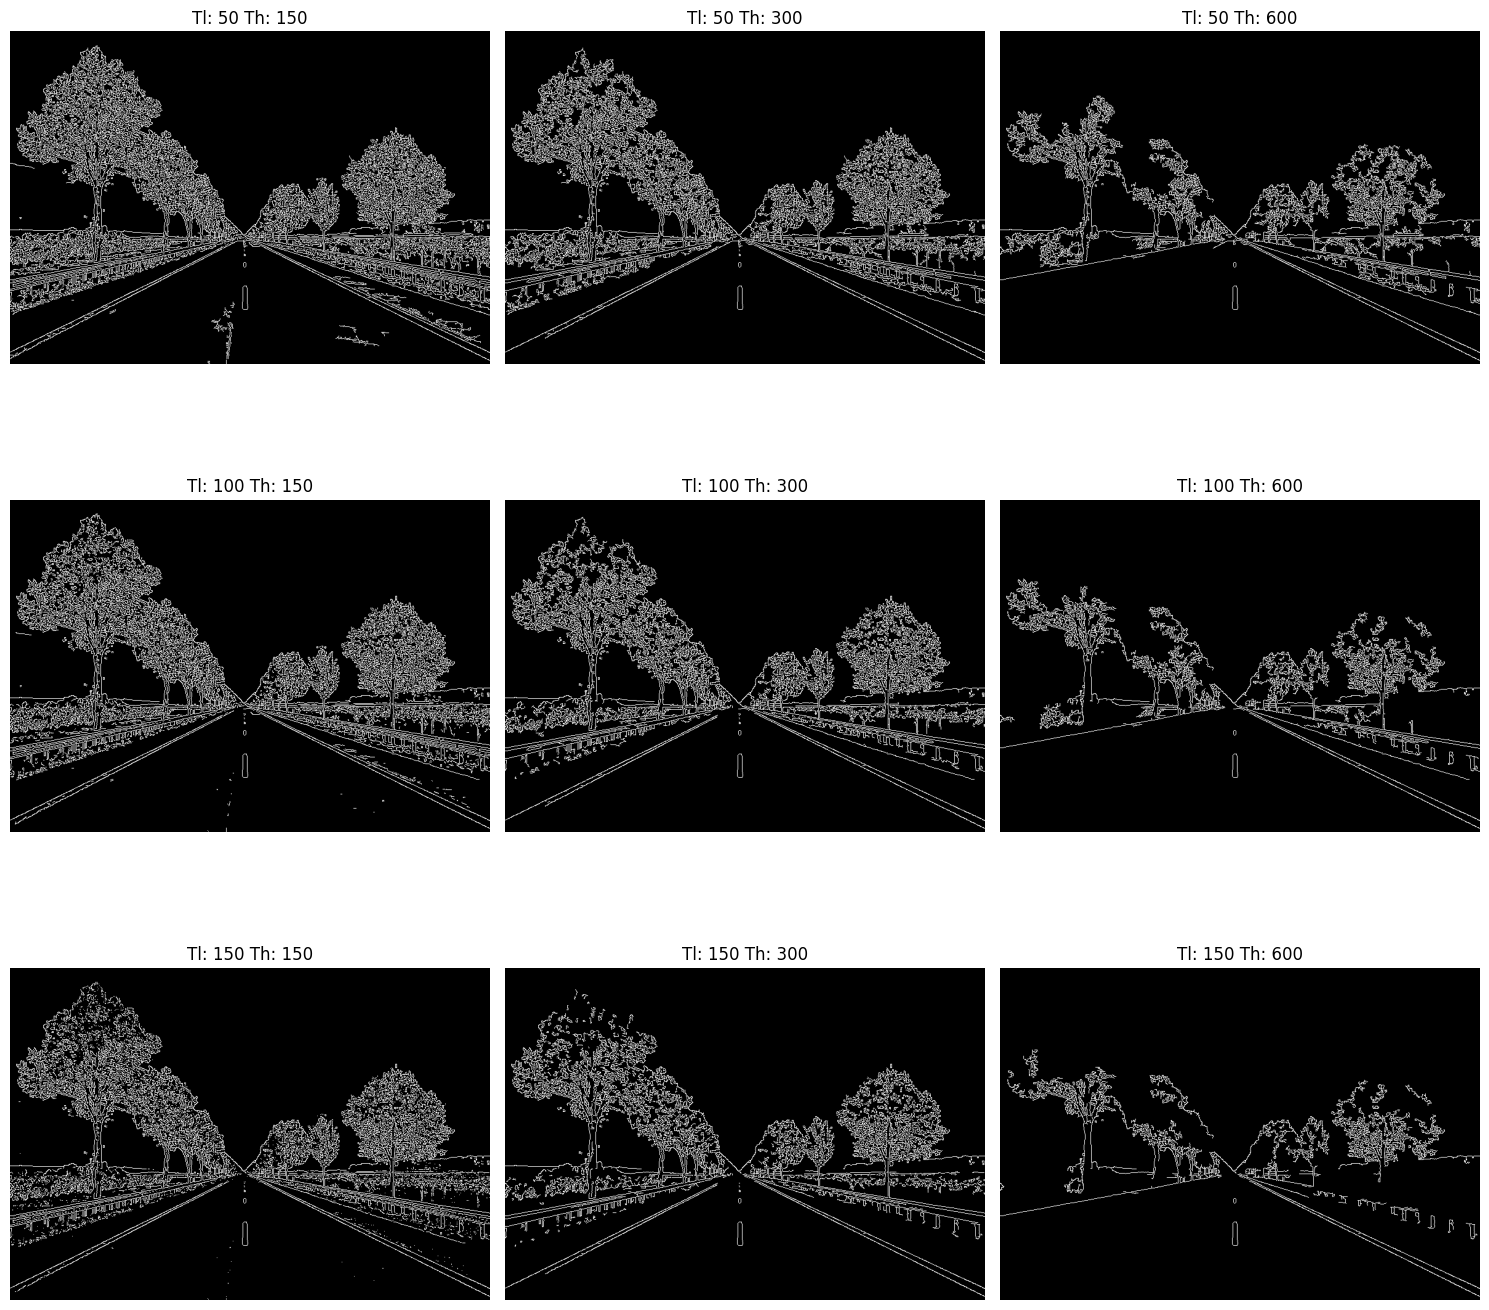

In [35]:
images = []
titles = []
Tl = [50,100,150]
Th = [150,300,600]

for tl in Tl:
    for th in Th:
        result = cv2.Canny(gray,tl,th,apertureSize=3)
        resultTitle = f'Tl: {tl} Th: {th}'
        images.append(result)
        titles.append(resultTitle)
        
display_images(images,titles)

**Descrption:** Apply the HT technique for Line detection.

In [36]:
# This returns an array of r and theta values
lines = cv2.HoughLines(edges, 1, np.pi/180, 315) # Accumulator threshold =350.

In [37]:
print(lines)

[[[143.          2.0071287]]

 [[346.          1.553343 ]]

 [[467.          1.1170107]]

 [[123.          2.042035 ]]

 [[263.          1.7453293]]]


**Description:** Draw the detected straight lines

In [38]:
# The below for loop runs till r and theta values
# are in the range of the 2d array
lines = np.array(lines)

print(lines.shape)




for r_theta in lines:
    arr = np.array(r_theta[0], dtype=np.float64)
    r, theta = arr
    # Stores the value of cos(theta) in a
    a = np.cos(theta)

    # Stores the value of sin(theta) in b
    b = np.sin(theta)

    # x0 stores the value rcos(theta)
    x0 = a*r

    # y0 stores the value rsin(theta)
    y0 = b*r

    # x1 stores the rounded off value of (rcos(theta)-1000sin(theta))
    x1 = int(x0 + 1000*(-b))

    # y1 stores the rounded off value of (rsin(theta)+1000cos(theta))
    y1 = int(y0 + 1000*(a))

    # x2 stores the rounded off value of (rcos(theta)+1000sin(theta))
    x2 = int(x0 - 1000*(-b))

    # y2 stores the rounded off value of (rsin(theta)-1000cos(theta))
    y2 = int(y0 - 1000*(a))

    # cv2.line draws a line in img from the point(x1,y1) to (x2,y2).
    # (0,0,255) denotes the colour of the line to be
    # drawn. In this case, it is red.
    cv2.line(img, (x1, y1), (x2, y2), (0, 0, 255), 2)


(5, 1, 2)


In [39]:
def draw_rotheta_line(img , ro,theta):
    
    res = img.copy()
    arr = np.array([ro,theta], dtype=np.float64)
    r, theta = arr
    # Stores the value of cos(theta) in a
    a = np.cos(theta)

    # Stores the value of sin(theta) in b
    b = np.sin(theta)

    # x0 stores the value rcos(theta)
    x0 = a*r

    # y0 stores the value rsin(theta)
    y0 = b*r

    # x1 stores the rounded off value of (rcos(theta)-1000sin(theta))
    x1 = int(x0 + 1000*(-b))

    # y1 stores the rounded off value of (rsin(theta)+1000cos(theta))
    y1 = int(y0 + 1000*(a))

    # x2 stores the rounded off value of (rcos(theta)+1000sin(theta))
    x2 = int(x0 - 1000*(-b))

    # y2 stores the rounded off value of (rsin(theta)-1000cos(theta))
    y2 = int(y0 - 1000*(a))

    # cv2.line draws a line in img from the point(x1,y1) to (x2,y2).
    # (0,0,255) denotes the colour of the line to be
    # drawn. In this case, it is red.
    cv2.line(res, (x1, y1), (x2, y2), (0, 0, 255), 2)
    return res

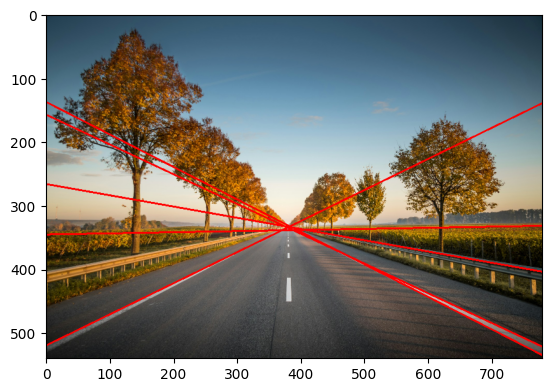

In [40]:
imd_disp = cv2.cvtColor(img,cv2.COLOR_RGB2BGR)
plt.imshow(imd_disp)

## Task # 02 Generate the Hough/Accumulator Space using the rho-theta parameters. **[Complete This Task]**

a. Vote in the parameter space.

b. Display the Hough/Accumulator space.

In [41]:
# Code here

def line_drawer_new(space,space_rhotheta,point):
    
    max_rho = space.shape[0] // 2   
    max_theta = space.shape[1]
    y,x = point
    theta = np.linspace(-np.pi/2, np.pi/2 , max_theta)
    
    rho = x * np.cos(theta) + y * np.sin(theta)
    
    for i in range(space.shape[1]):
        space         [ int(rho[i]) + max_rho , i ] += 1
        space_rhotheta[int(rho[i])+max_rho,i,0] = rho[i]
        space_rhotheta[int(rho[i])+max_rho,i,1] = theta[i]
    return space 



In [42]:
# runaway = load_image_as_np_array("DIP3E_Original_Images_CH10/runaway.tif")
runaway_edge = edges


(429.0, (808, 25))

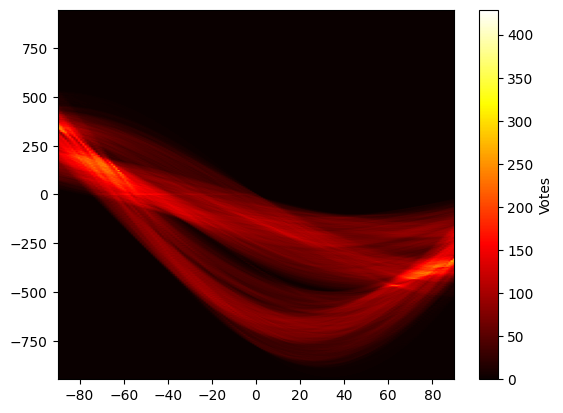

In [43]:
r , c = runaway_edge.shape

maxrho= int(np.sqrt(r*r + c*c))
maxangle = 180

space_rotheta = np.zeros(shape=(2*maxrho,maxangle,2))
space_vote = np.zeros(shape = (2*maxrho,maxangle) )

edge_thresh = 100


for i in range(runaway_edge.shape[0]):
    for j in range(runaway_edge.shape[1]):
        
        if runaway_edge[i,j] > edge_thresh:
           line_drawer_new(space_vote,space_rotheta,(i,j))
            
            
            
# display_images([space_vote],["result"])

plt.imshow(space_vote, cmap='hot', aspect='auto', extent=[-90, 90, -maxrho, maxrho])
plt.colorbar(label='Votes')

np.max(space_vote),np.unravel_index(np.argmax(space_vote),shape=space_vote.shape)

## Task # 03 Display the detected straight lines **[Home Assignment]**

a. Apply the Threshold on to the parameter space, and list the line parameters

b. Draw the lines on the input image.

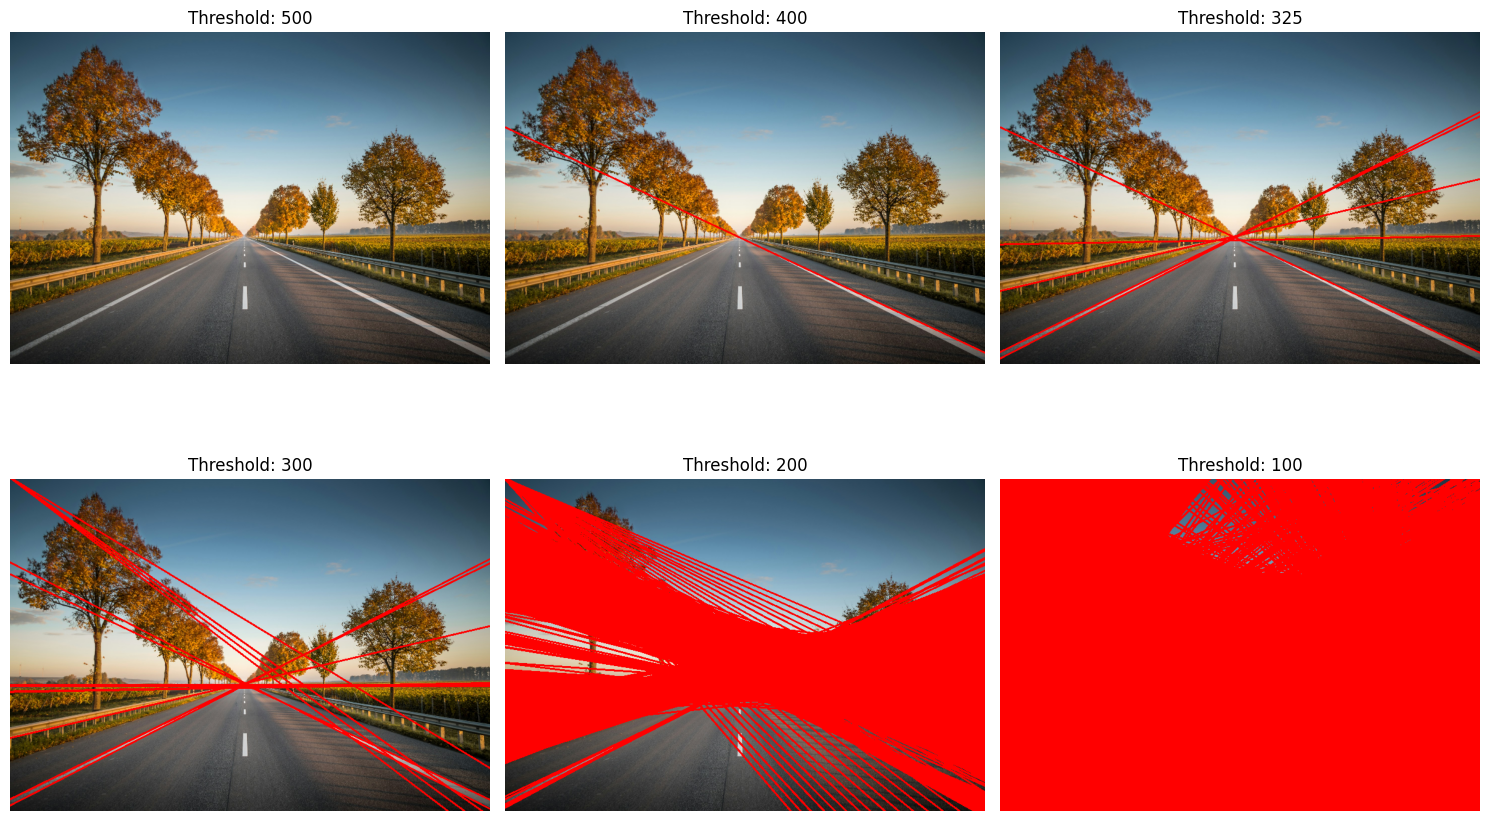

In [44]:
# Code here.
imgs =[]
titles=[]

thresh=reversed([100,200,300,325,400,500])

for t in thresh:

    res = img_task3
    title=''
    for i in range(space_rotheta.shape[0]):
        for j in range(space_rotheta.shape[1]):
            rotheta = space_rotheta[i,j]
            
            if space_vote[i,j] > t:
                res = draw_rotheta_line(res, ro=rotheta[0],theta=rotheta[1])
    
    title = f'Threshold: {t}'
    imgs.append(res)
    titles.append(title)

display_color_images(imgs,titles)

# Discussion

## Task 1

Task 1 was done for us. Here we displayed the use of the ```cv2.Canny()``` function where it was used to detect edges from an image.This edge detected image was later used to perform the hough transform. The usages of the two parameters $T_l$ and $T_h$ of the ```Canny()``` function was demonstrated previously, where it was shown how decreasing and incresing the parameters affected the amount of edges detected.  
Also a useful function for drawing a line on an image using the $(\rho,\theta)$ parameters was provided. This function was later used to draw the lines in task 3.

## Task 2

In task 2, to implement Hough transform parameter space, I had to loop through all the pixels in the edge detected image, if the pixel $(x_i,y_i)$ was lit, then in the parameter space I had to plot the $\rho$ and $\theta$ parameters according to the equation $xcos\theta + ysin\theta = \rho$. The horizontal axis plotted $\theta$ ranging from $-\pi < \theta < \pi$. The resolution was 1 degree. The Vertical axis had the $\rho$ parameter where it varied from $-\rho_{max} < \rho < \rho_{max} $, where $\rho_{max} = \sqrt{ImageWidth^2 +ImageHeight^2} $. In each $(\rho,\theta)$ co-ordinate of the Hough space , a vote of +1 is given. To reconstruct the lines, the $(\rho,\theta)$ co-ords with votes above a certain threshold are used.

After plotting, ```plt.pyplot()``` was used to visualize the plot. We could see the wavy nature of the hough space due to the sines and cosines of the $\theta$ parameter space. The hough space displays co-ordinates with higher intensities signifying the fact that those points have more votes than its surroundings.Those points were later used to construct the lines in the original image.

## Task 3

The hough space we got from task 2 was used to form the lines in Task3. I utilised the code snippet provided in task 1 where a $\rho$ and $\theta$ parameter was taken to print a line on an image. Then setting a threshold $T_h = 325 $ I selecected $(\rho,\theta)$ points from the Hough space which had votes more than $T_h$. Then the points selected were used to draw a line. Changing the threshold to a lower value gave higher number of lines as more voting points were included. 